In [345]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import math
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import os


In [346]:
tickers_1m = {
    "SOL_1m"  : "../Data/1m_Data/SOL_USDC_USDC_1m.csv",
    "ETH_1m"  : "../Data/1m_Data/ETH_USDC_USDC_1m.csv",
    "BTC_1m"  : "../Data/1m_Data/BTC_USDC_USDC_1m.csv",
    "AVAX_1m" : "../Data/1m_Data/AVAX_USDC_USDC_1m.csv",
    "NEAR_1m" : "../Data/1m_Data/NEAR_USDC_USDC_1m.csv",
    "OP_1m"   : "../Data/1m_Data/OP_USDC_USDC_1m.csv",
    "ARB_1m"  : "../Data/1m_Data/ARB_USDC_USDC_1m.csv",
    "LDO_1m"  : "../Data/1m_Data/LDO_USDC_USDC_1m.csv",
    "LINK_1m" : "../Data/1m_Data/LINK_USDC_USDC_1m.csv",
    "AAVE_1m" : "../Data/1m_Data/AAVE_USDC_USDC_1m.csv"
}


tickers_3m = {
    "SOL_3m"  : "../Data/3m_Data/SOL_USDC_USDC_3m.csv",
    "ETH_3m"  : "../Data/3m_Data/ETH_USDC_USDC_3m.csv",
    "BTC_3m"  : "../Data/3m_Data/BTC_USDC_USDC_3m.csv",
    "AVAX_3m" : "../Data/3m_Data/AVAX_USDC_USDC_3m.csv",
    "NEAR_3m" : "../Data/3m_Data/NEAR_USDC_USDC_3m.csv",
    "OP_3m"   : "../Data/3m_Data/OP_USDC_USDC_3m.csv",
    "ARB_3m"  : "../Data/3m_Data/ARB_USDC_USDC_3m.csv",
    "LDO_3m"  : "../Data/3m_Data/LDO_USDC_USDC_3m.csv",
    "LINK_3m" : "../Data/3m_Data/LINK_USDC_USDC_3m.csv",
    "AAVE_3m" : "../Data/3m_Data/AAVE_USDC_USDC_3m.csv"
}


tickers_5m = {
    "SOL_5m"  : "../Data/5m_Data/SOL_USDC_USDC_5m.csv",
    "ETH_5m"  : "../Data/5m_Data/ETH_USDC_USDC_5m.csv",
    "BTC_5m"  : "../Data/5m_Data/BTC_USDC_USDC_5m.csv",
    "AVAX_5m" : "../Data/5m_Data/AVAX_USDC_USDC_5m.csv",
    "NEAR_5m" : "../Data/5m_Data/NEAR_USDC_USDC_5m.csv",
    "OP_5m"   : "../Data/5m_Data/OP_USDC_USDC_5m.csv",
    "ARB_5m"  : "../Data/5m_Data/ARB_USDC_USDC_5m.csv",
    "LDO_5m"  : "../Data/5m_Data/LDO_USDC_USDC_5m.csv",
    "LINK_5m" : "../Data/5m_Data/LINK_USDC_USDC_5m.csv",
    "AAVE_5m" : "../Data/5m_Data/AAVE_USDC_USDC_5m.csv"
}


tickers_15m = {
    "SOL_15m"  : "../Data/15m_Data/SOL_USDC_USDC_15m.csv",
    "ETH_15m"  : "../Data/15m_Data/ETH_USDC_USDC_15m.csv",
    "BTC_15m"  : "../Data/15m_Data/BTC_USDC_USDC_15m.csv",
    "AVAX_15m" : "../Data/15m_Data/AVAX_USDC_USDC_15m.csv",
    "NEAR_15m" : "../Data/15m_Data/NEAR_USDC_USDC_15m.csv",
    "OP_15m"   : "../Data/15m_Data/OP_USDC_USDC_15m.csv",
    "ARB_15m"  : "../Data/15m_Data/ARB_USDC_USDC_15m.csv",
    "LDO_15m"  : "../Data/15m_Data/LDO_USDC_USDC_15m.csv",
    "LINK_15m" : "../Data/15m_Data/LINK_USDC_USDC_15m.csv",
    "AAVE_15m" : "../Data/15m_Data/AAVE_USDC_USDC_15m.csv"
}





In [347]:
base_symbol = "NEAR"
quote_symbol = "AVAX"
timeframe = "5m"

ticker_map = {
    "1m": tickers_1m,
    "3m": tickers_3m,
    "5m": tickers_5m,
    "15m": tickers_15m
}



base_df = pd.read_csv(ticker_map[timeframe][f"{base_symbol}_{timeframe}"])
quote_df = pd.read_csv(ticker_map[timeframe][f"{quote_symbol}_{timeframe}"])

base_close = base_df['close']
quote_close = quote_df['close']

In [348]:

base_close_series = base_close
quote_close_series = quote_close

shared_timestamps = base_close_series.index.intersection(quote_close_series.index)

base_price_aligned = base_close_series.loc[shared_timestamps]
quote_price_aligned = quote_close_series.loc[shared_timestamps]


first_axis = base_price_aligned.to_numpy()
second_axis = quote_price_aligned.to_numpy()


/var/folders/c_/_ctxnkln1z76h710t7sk2rk40000gn/T/ipykernel_14084/2723351006.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


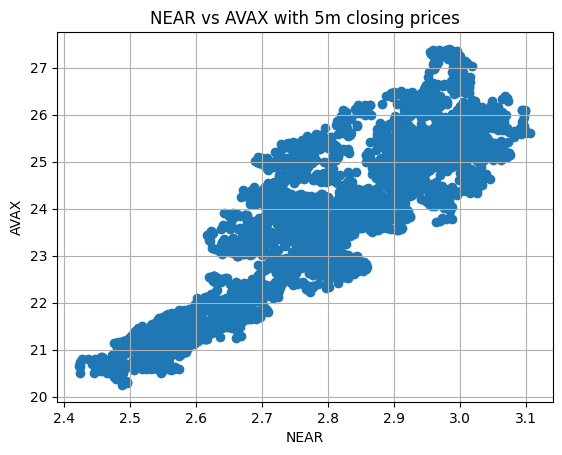

In [349]:
fig, ax = plt.subplots()
ax.scatter(first_axis,second_axis)
ax.set_xlabel(base_symbol)
ax.set_ylabel(quote_symbol)
ax.set_title(f"{base_symbol} vs {quote_symbol} with {timeframe} closing prices")
ax.grid(True)
fig.show()

<function matplotlib.pyplot.show(close=None, block=None)>

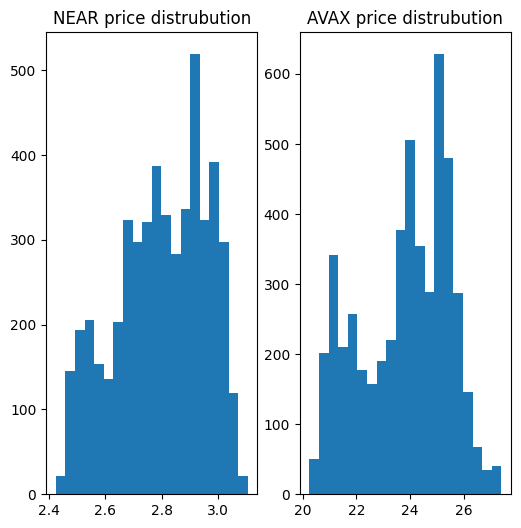

In [350]:
bins = 20

fig,(base_hist,quote_hist) = plt.subplots(nrows=1,ncols=2,figsize=(6,6))
base_hist.hist(first_axis,bins=bins)
base_hist.set_title(f"{base_symbol} price distrubution")

quote_hist.hist(second_axis,bins=bins)
quote_hist.set_title(f"{quote_symbol} price distrubution")

plt.show


In [351]:
price_matrix = np.matrix(
    [first_axis,second_axis]
    
    
    )
print(price_matrix.shape)



# print(matrix)

(2, 5013)


In [352]:
first_axis_mean = first_axis.mean()
second_axis_mean = second_axis.mean()

first_axis = [v-first_axis_mean for v in first_axis]
second_axis = [j-second_axis_mean for j in second_axis]

price_centered_matrix = np.matrix(
    [first_axis,second_axis]
)
print(price_centered_matrix.shape)

(2, 5013)


In [353]:
U,Singular_Vals,V_Trans = np.linalg.svd(price_centered_matrix,full_matrices=False)
principal_vector_one = V_Trans[0,:]
principal_vector_two = V_Trans[1,:]


In [354]:
singular_vals_squared = [v**2 for v in Singular_Vals]

lambda_1 = singular_vals_squared[0] 
lambda_2 = singular_vals_squared[1] 

total_variance = lambda_1 + lambda_2
lambda_1_var = lambda_1/total_variance
lambda_2_var = lambda_2/total_variance

print(f"Total variance is {total_variance:.2f}")
print(f"lambda one explains {lambda_1_var * 100:.2f}%")
print(f"lambda two explains {lambda_2_var * 100:.2f}%")

Total variance is 13770.82
lambda one explains 99.82%
lambda two explains 0.18%


In [355]:
p_reduced = Singular_Vals[0] * principal_vector_one
p_reduced_1d = np.array(p_reduced).flatten()

  

In [356]:
result = adfuller(p_reduced_1d)

adf_stat = result[0]
p_value = result[1]

used_lags = result[2]
n_obs = result[3]

critical_values = result[4]

print(f"ADF Statistic: {adf_stat:.10f}")
print(f"p-value: {p_value:.10f}")
print(f"Used Lags: {used_lags}")
print(f"Number of Observations: {n_obs}")
print("Critical Values:")
for key, value in critical_values.items():
       print(f"    {key}: {value}")



ADF Statistic: -2.0364223225
p-value: 0.2708349592
Used Lags: 6
Number of Observations: 5006
Critical Values:
    1%: -3.431656962913683
    5%: -2.862117536432845
    10%: -2.5670774233173486


Text(0.5, 1.0, 'Resisdual histogram')

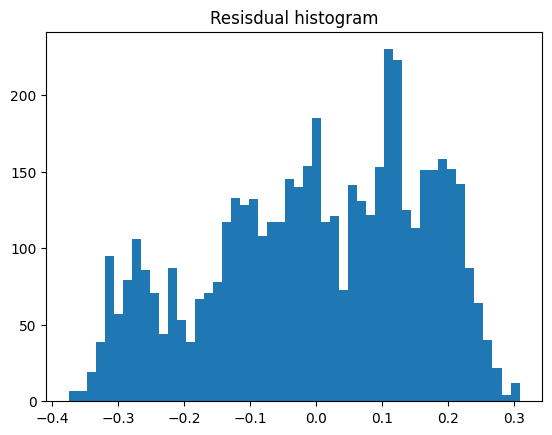

In [357]:
bins = 50

fig,(base_hist) = plt.subplots()
base_hist.hist(first_axis,bins=bins)
base_hist.set_title("Resisdual histogram")